In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
df_index=pd.read_csv('economic_index.csv')

In [85]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [86]:
## Drop unncessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [87]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [88]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

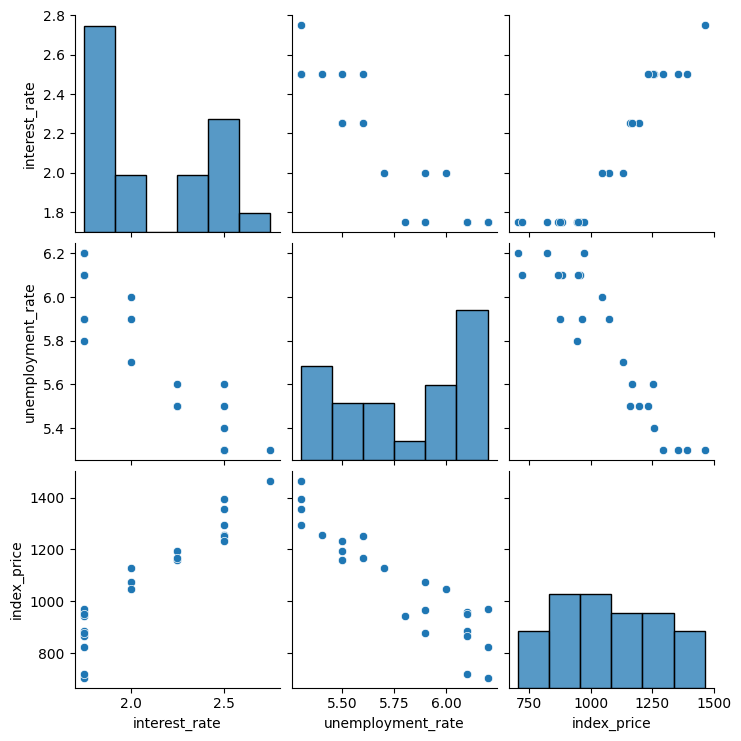

In [89]:
## Lets Do some vizulation
import seaborn as sns
sns.pairplot(df_index)

In [90]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

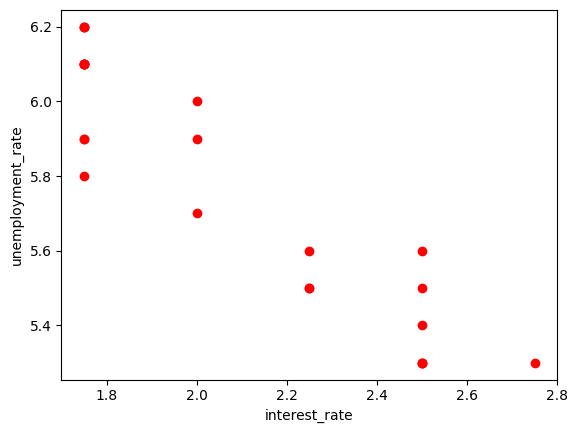

In [91]:
## Visulaize datapoint more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [92]:
## Independent and dependent feature
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,:-1]

In [93]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [94]:
y

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [95]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

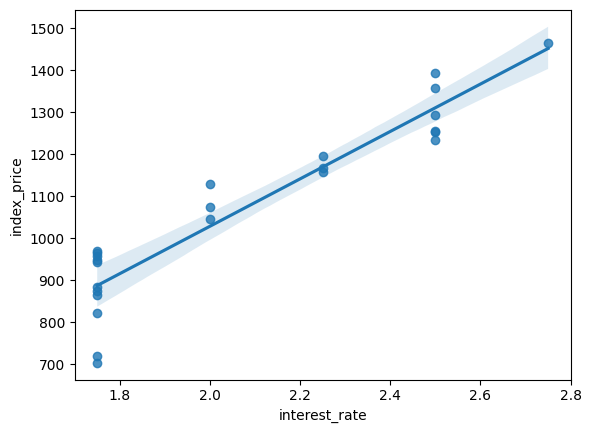

In [96]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

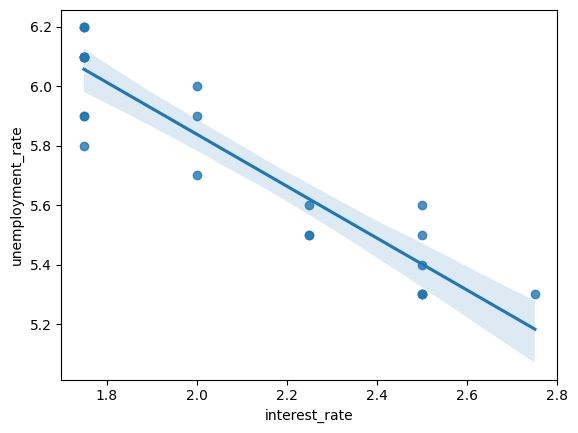

In [97]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

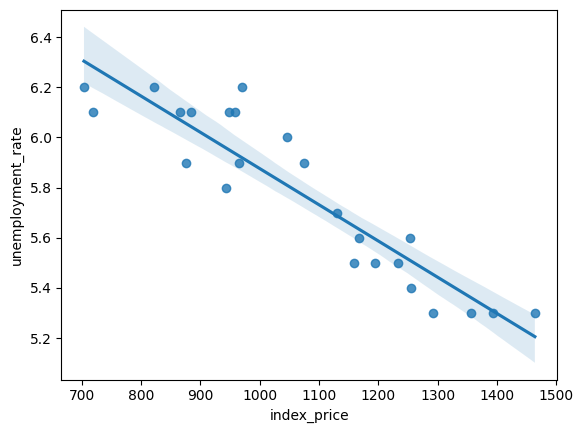

In [98]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [99]:
from sklearn.preprocessing import StandardScaler


In [100]:
scaler=StandardScaler()
# Fit and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test = scaler.transform(X_test)

In [101]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [102]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [103]:
regression.fit(X_train,Y_train)

LinearRegression()

In [104]:
## Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [105]:
np.mean(validation_score)

np.float64(-1.3695501826753679e-31)

In [106]:
## Preduction
y_pred=regression.predict(X_test)

In [107]:
y_pred

array([[2.25, 5.5 ],
       [1.75, 6.2 ],
       [2.75, 5.3 ],
       [1.75, 6.1 ],
       [2.  , 5.9 ],
       [2.25, 5.6 ]])

In [108]:
## Performance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.0
0.0
0.0


In [111]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)

1.0


In [112]:
## Assumption

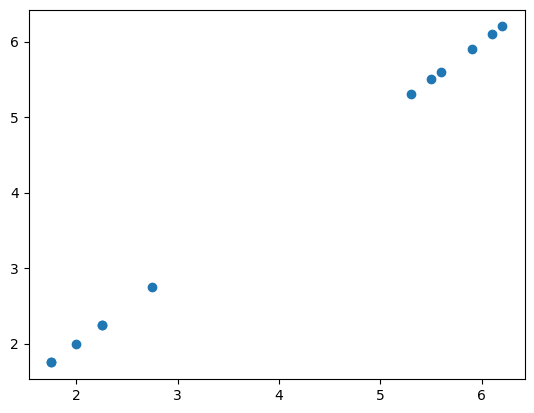

In [113]:
plt.scatter(Y_test,y_pred)

In [115]:
resudiasl=Y_test,y_pred
print(resudiasl)

(    interest_rate  unemployment_rate
8            2.25                5.5
16           1.75                6.2
0            2.75                5.3
18           1.75                6.1
11           2.00                5.9
9            2.25                5.6, array([[2.25, 5.5 ],
       [1.75, 6.2 ],
       [2.75, 5.3 ],
       [1.75, 6.1 ],
       [2.  , 5.9 ],
       [2.25, 5.6 ]]))


In [116]:
sns.displot(resudiasl,kind='kde')

ValueError: Data must be 1-dimensional, got ndarray of shape (6, 2) instead

ValueError: x and y must be the same size

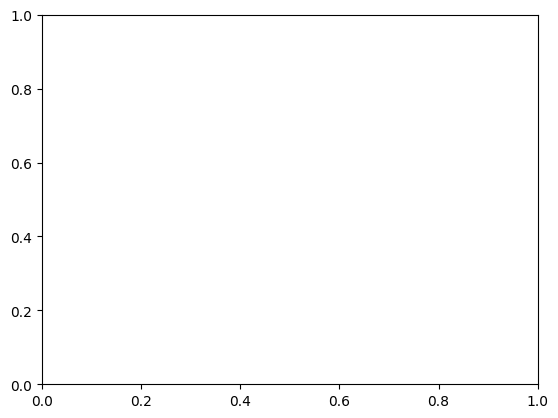

In [117]:
## Scatter plot with respect to prediction and resiudals
plt.scatter(y_pred,resudiasl)